# Courtesy and Insights




https://blog.roboflow.com/aerial-fire-detection/

https://github.com/tim3in/Fire-Detection-Drone/blob/main/drone_fire_detection_yolov8.ipynb?ref=blog.roboflow.com

Contributing Writer. (Sep 19, 2023). Aerial Fire Detection with Drone Imagery and Computer Vision. Roboflow Blog: https://blog.roboflow.com/aerial-fire-detection/

# Step 1.  Generate Forest fire images using Dalle

Prompts used :

create  images of forest fire from drone view from upwards. The view should be from top down. The fire should be in one places in the image and not the entire image. Fire should be just small to medium.


create images of forest fire from drone view from upwards. The view should be from top down. The fire should be in just two places in the image and not the entire image. Fire should be just in small area of the entire picture. Make sure there are not more than 2 fires in a single image.





# Step 2. Convert downloaded images to jpeg

In [ ]:
import os
from PIL import Image

# Define the current directory and output directory
current_directory = os.getcwd()
output_directory = os.path.join(current_directory, 'jpg_images')

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize a counter for the new filenames
file_counter = 1

# Loop through all files in the current directory
for filename in os.listdir(current_directory):
    if filename.endswith('.webp'):
        # Open the image file
        img_path = os.path.join(current_directory, filename)
        img = Image.open(img_path)

        # Convert the image to RGB (this is necessary for WEBP images)
        rgb_img = img.convert('RGB')

        # Define the new filename
        new_filename = f'f{file_counter}.jpg'
        new_path = os.path.join(output_directory, new_filename)

        # Save the image as JPG
        rgb_img.save(new_path, 'JPEG')

        print(f'Converted {filename} to {new_filename}')

        # Increment the file counter
        file_counter += 1

print('All images have been converted.')


# Step 3. Upload images to Roboflow.

Do manual annotation

Add Labels

Add Bounding boxes.

https://universe.roboflow.com/test-4h9f7/forest-fire-detection-htmfx


Split Images to train, test, valid datasets

#Step 4. Install packages

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image

# Step 5. Download Dataset from roboflow

In [ ]:
import getpass
import os


os.environ["YOUR_API_KEY"] = getpass.getpass()

··········


In [ ]:
YOUR_API_KEY = getpass.getpass()

··········


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import requests

#YOUR_API_KEY = "YOUR_ACTUAL_API_KEY"  # Replace with your actual API key

url = "https://api.roboflow.com/"
headers = {"Authorization": f"Bearer {YOUR_API_KEY}"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    workspaces = response.json()
    print(workspaces)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

{'welcome': 'Welcome to the Roboflow API.', 'instructions': 'You are successfully authenticated.', 'docs': 'https://docs.roboflow.com', 'workspace': 'test-4h9f7'}


In [ ]:
import requests

# = "YOUR_ACTUAL_API_KEY"  # Replace with your actual API key
WORKSPACE_NAME = "test-4h9f7"  # Replace with your workspace name

url = f"https://api.roboflow.com/{WORKSPACE_NAME}"
headers = {"Authorization": f"Bearer {YOUR_API_KEY}"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    workspace_data = response.json()
    projects = workspace_data.get("projects", [])  # Extract the projects list

    if projects:
        print("Projects in workspace '{}':".format(WORKSPACE_NAME))
        for project in projects:
            print("- {}".format(project["name"]))
    else:
        print("No projects found in workspace '{}'.".format(WORKSPACE_NAME))
else:
    print(f"Error: {response.status_code}")
    print(response.text)

No projects found in workspace 'test-4h9f7'.


IF needed, Find project name from UI.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=YOUR_API_KEY)
project = rf.workspace("test-4h9f7").project("forest-fire-detection-htmfx")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to forest-fire-detection-1 in yolov8:: 100%|██████████| 168/168 [00:00<00:00, 1447.08it/s]


In [ ]:
!ls -ltr /content/datasets

total 4
drwxr-xr-x 5 root root 4096 Jul 19 05:18 forest-fire-detection-1


In [ ]:
!ls -ltr /content/datasets/forest-fire-detection-1

total 24
-rw-r--r-- 1 root root  997 Jul 19 05:18 README.roboflow.txt
-rw-r--r-- 1 root root  162 Jul 19 05:18 README.dataset.txt
drwxr-xr-x 4 root root 4096 Jul 19 05:18 test
drwxr-xr-x 4 root root 4096 Jul 19 05:18 train
drwxr-xr-x 4 root root 4096 Jul 19 05:18 valid
-rw-r--r-- 1 root root  320 Jul 19 05:18 data.yaml


# Step 6. Train ultralytics YOLO model

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov8m.pt')

# Define the dataset location
#dataset_location = '/path/to/your/dataset'  # Change this to your actual dataset location
dataset_location = '/content/datasets/forest-fire-detection-1'  # Change this to your actual dataset location


# Change the current working directory to HOME
#os.chdir(HOME)
#print(f"Changed directory to {os.getcwd()}")

# Train the model
model.train(data=f'{dataset_location}/data.yaml', epochs=35, imgsz=800, plots=True)


100%|██████████| 49.7M/49.7M [00:00<00:00, 381MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/datasets/forest-fire-detection-1/data.yaml, epochs=35, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

restart session if needed

In [ ]:
!ls -ltr /content

total 8
drwxr-xr-x 4 root root 4096 Jul 19 04:40 datasets
drwxr-xr-x 3 root root 4096 Jul 19 04:54 runs


In [ ]:
!ls -ltr /content/datasets/runs/detect/train/weights

total 101672
-rw-r--r-- 1 root root 52052939 Jul 19 04:44 last.pt
-rw-r--r-- 1 root root 52052939 Jul 19 04:44 best.pt


In [ ]:
!ls -ltr  /content/datasets/forest-fire-detection-1/

total 24
-rw-r--r-- 1 root root  997 Jul 19 04:38 README.roboflow.txt
-rw-r--r-- 1 root root  162 Jul 19 04:38 README.dataset.txt
drwxr-xr-x 4 root root 4096 Jul 19 04:38 test
-rw-r--r-- 1 root root  320 Jul 19 04:38 data.yaml
drwxr-xr-x 4 root root 4096 Jul 19 04:40 train
drwxr-xr-x 4 root root 4096 Jul 19 04:40 valid


# Step 7. Run Prediction on test images

In [ ]:
from ultralytics import YOLO

# Define the model and other parameters
model_path = '/content//datasets/runs/detect/train/weights/best.pt'  # Replace with the correct path to your model
source_path = '/content/datasets/forest-fire-detection-1/test/images'  # Replace with the correct path to your test images
conf_threshold = 0.25  # Confidence threshold
save_results = True  # Save the results

# Load the YOLO model
model = YOLO(model_path)

# Run the prediction
results = model.predict(source=source_path, conf=conf_threshold, save=save_results)

# Optionally, print or process the results
for result in results:
    print(result)


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
Results saved to runs/detect/predict


tensor([[351.00000, 272.00000, 434.00000, 368.00000,   0.74510,   0.00000],
        [191.00000, 270.00000, 269.00000, 372.00000,   0.72204,   0.00000]], device='cuda:0')
tensor([[285.00000, 191.00000, 404.00000, 360.00000,   0.71057,   0.00000]], device='cuda:0')
tensor([[2.26000e+02, 1.69000e+02, 4.38000e+02, 3.98000e+02, 4.13087e-01, 0.00000e+00],
        [2.73000e+02, 2.23000e+02, 4.11000e+02, 3.97000e+02, 3.52762e-01, 0.00000e+00]], device='cuda:0')
tensor([], device='cuda:0', size=(0, 6))
tensor([[292.00000, 241.00000, 362.00000, 352.00000,   0.64314,   0.00000]], device='cuda:0')
tensor([[259.00000, 214.00000, 405.00000, 398.00000,   0.62265,   0.00000]], device='cuda:0')
tensor([[3.97000e+02, 1.43000e+02, 5.06000e+02, 3.30000e+02, 4.61356e-01, 0.00000e+00]], device='cuda:0')
tensor([[1.69000e+02, 2.93000e+02, 2.36000e+02, 4.17000e+02, 6.32120e-01, 0.00000e+00],
        [3.96000e+02, 2.55000e+02, 4.57000e+02, 3.43000e+02, 3.96172e-01, 0.00000e+00]], device='cuda:0')


In [ ]:
#%cd {HOME}
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


In [ ]:
#

restart session if needed

In [ ]:
!ls -ltr /content/datasets/forest-fire-detection-1

total 24
-rw-r--r-- 1 root root  997 Jul 19 05:18 README.roboflow.txt
-rw-r--r-- 1 root root  162 Jul 19 05:18 README.dataset.txt
drwxr-xr-x 4 root root 4096 Jul 19 05:18 test
-rw-r--r-- 1 root root  320 Jul 19 05:18 data.yaml
drwxr-xr-x 4 root root 4096 Jul 19 05:18 train
drwxr-xr-x 4 root root 4096 Jul 19 05:18 valid


In [ ]:
!ls -ltr runs/detect/predict

total 1524
-rw-r--r-- 1 root root 204999 Jul 19 04:54 f23_jpg.rf.d8a2b812db18abfc18da1ec6f2439a21.jpg
-rw-r--r-- 1 root root 173247 Jul 19 04:54 f40_jpg.rf.b057c74acd17d3a0e1511f0276dffbd5.jpg
-rw-r--r-- 1 root root 203868 Jul 19 04:54 f62_jpg.rf.e2e91313cc574333a8d37778a682e795.jpg
-rw-r--r-- 1 root root 179364 Jul 19 04:54 f65_jpg.rf.89979d67883716bf1050e51c4a4932f0.jpg
-rw-r--r-- 1 root root 186968 Jul 19 04:54 f67_jpg.rf.90efa415d8ead937292202dfb160457e.jpg
-rw-r--r-- 1 root root 199897 Jul 19 04:54 f70_jpg.rf.5a78c1e83d95125a42d6aa69cd68462c.jpg
-rw-r--r-- 1 root root 184890 Jul 19 04:54 f79_jpg.rf.436761b4706682f5ccfc8c7975118cf5.jpg
-rw-r--r-- 1 root root 211617 Jul 19 04:54 f82_jpg.rf.a6e026e31b7a9106684d8266afe3d7e9.jpg


# Step 8. Display predicted images

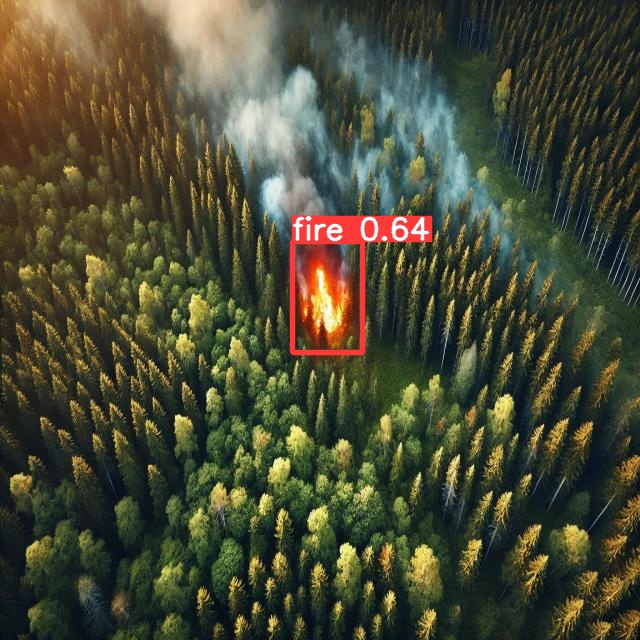

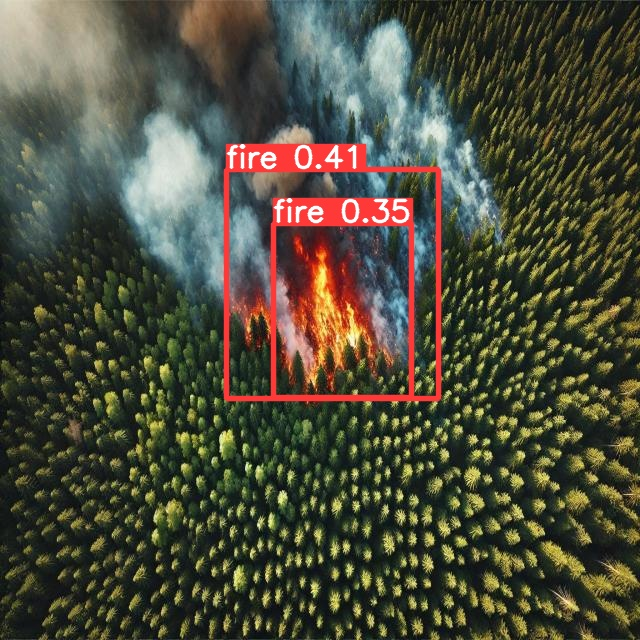

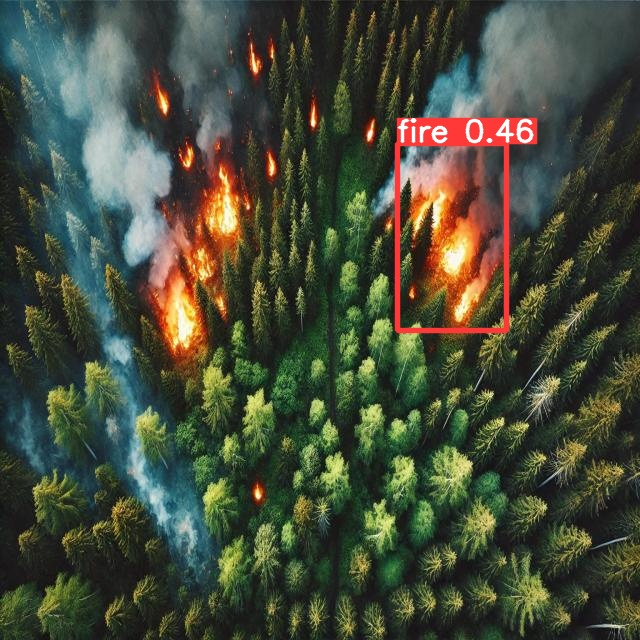

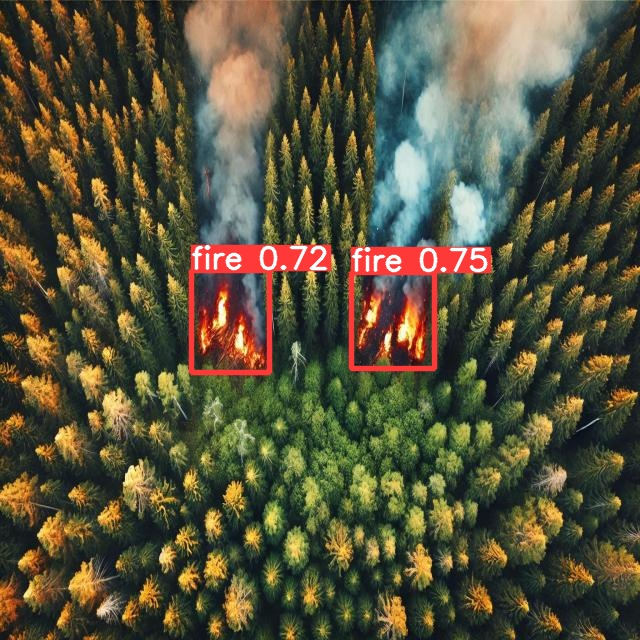

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Step 9. Alternate way for prediction using roboflow supervision

In [ ]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
#!pip install --upgrade supervision

In [ ]:
!echo {HOME}

/content


In [ ]:
!ls -ltr /content/datasets/forest-fire-detection-1/test/images


total 788
-rw-r--r-- 1 root root  89066 Jul 19 04:38 f40_jpg.rf.b057c74acd17d3a0e1511f0276dffbd5.jpg
-rw-r--r-- 1 root root 105573 Jul 19 04:38 f23_jpg.rf.d8a2b812db18abfc18da1ec6f2439a21.jpg
-rw-r--r-- 1 root root  93854 Jul 19 04:38 f65_jpg.rf.89979d67883716bf1050e51c4a4932f0.jpg
-rw-r--r-- 1 root root 104783 Jul 19 04:38 f62_jpg.rf.e2e91313cc574333a8d37778a682e795.jpg
-rw-r--r-- 1 root root 102787 Jul 19 04:38 f70_jpg.rf.5a78c1e83d95125a42d6aa69cd68462c.jpg
-rw-r--r-- 1 root root  96581 Jul 19 04:38 f67_jpg.rf.90efa415d8ead937292202dfb160457e.jpg
-rw-r--r-- 1 root root 106818 Jul 19 04:38 f82_jpg.rf.a6e026e31b7a9106684d8266afe3d7e9.jpg
-rw-r--r-- 1 root root  92342 Jul 19 04:38 f79_jpg.rf.436761b4706682f5ccfc8c7975118cf5.jpg


## Step 9 a) Display test image

In [ ]:
import cv2

IMAGE_PATH = "/content/datasets/forest-fire-detection-1/test/images/f40_jpg.rf.b057c74acd17d3a0e1511f0276dffbd5.jpg"
image = cv2.imread(IMAGE_PATH)

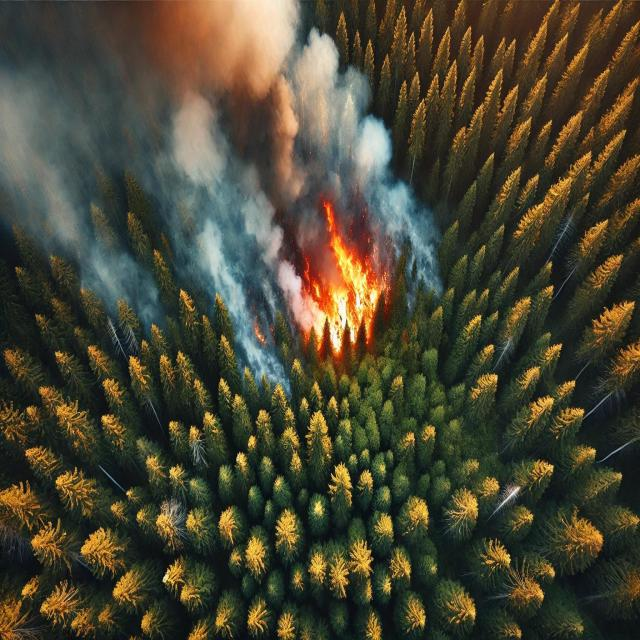

In [ ]:
from IPython.display import Image, display
display(Image(filename=IMAGE_PATH, width=600))

In [ ]:
!pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


restart session if needed

## Step 9 b) Run Prediction and user supervision for detection

In [ ]:
from ultralytics import YOLO
import supervision as sv

model = YOLO('/content//datasets/runs/detect/train/weights/best.pt')
result = model(image, verbose=False)[0]
print(dir(result))
#detections = sv.Detections.from_ultralytics(result)
# Extract class names from the model itself
#result.names = model.names

detections = sv.Detections.from_ultralytics(result) # Pass class_names to the function

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed',

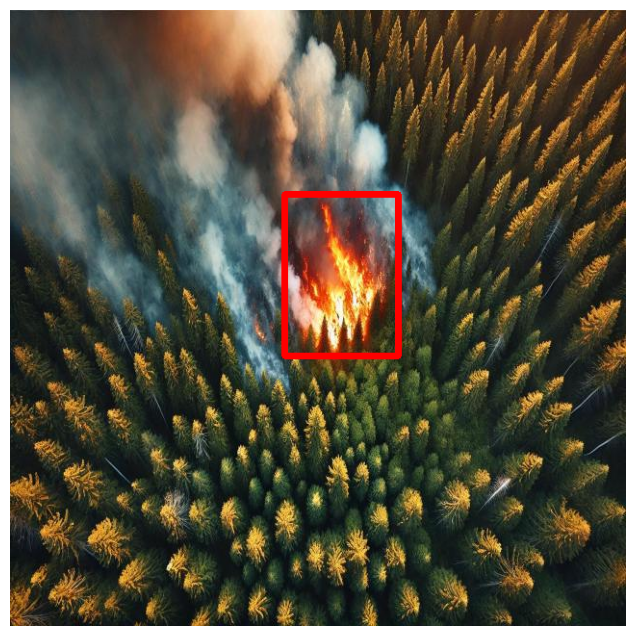

In [ ]:
color = sv.Color.from_hex("#FF0000")


box_annotator = sv.BoxAnnotator(color=color, thickness=5
                                )

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

#annotated_image = box_annotator.annotate(image.copy(), detections=detections, labels=labels)
annotated_image = box_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

## Step 9 c) Another sample for prediction

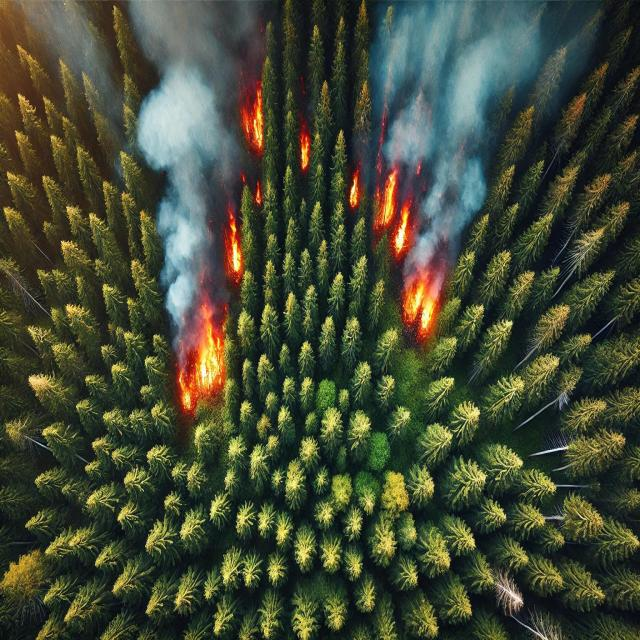

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed', 'summary', 'to', 'tojson', 'update', 'verbose']


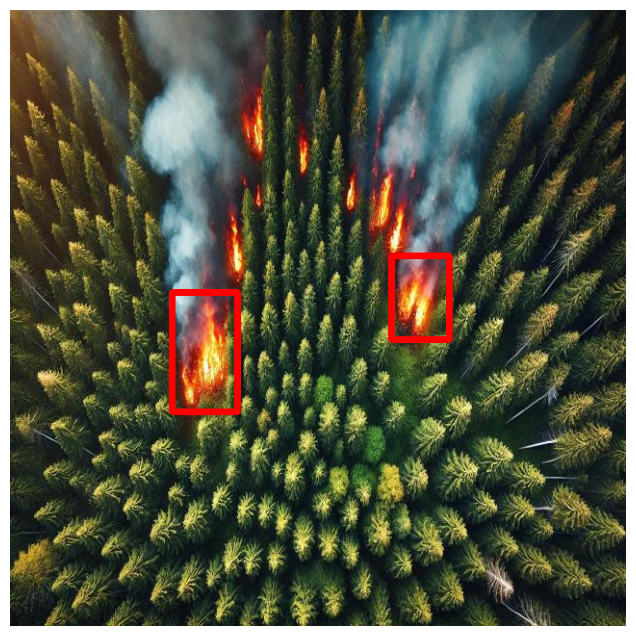

In [ ]:
from ultralytics import YOLO
import supervision as sv

import cv2

IMAGE_PATH = "/content/datasets/forest-fire-detection-1/test/images/f82_jpg.rf.a6e026e31b7a9106684d8266afe3d7e9.jpg"
image = cv2.imread(IMAGE_PATH)
from IPython.display import Image, display
display(Image(filename=IMAGE_PATH, width=600))

model = YOLO('/content//datasets/runs/detect/train/weights/best.pt')
result = model(image, verbose=False)[0]
print(dir(result))
#detections = sv.Detections.from_ultralytics(result)
# Extract class names from the model itself
#result.names = model.names

detections = sv.Detections.from_ultralytics(result) # Pass class_names to the function
color = sv.Color.from_hex("#FF0000")


box_annotator = sv.BoxAnnotator(color=color, thickness=5
                                )

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

#annotated_image = box_annotator.annotate(image.copy(), detections=detections, labels=labels)
annotated_image = box_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>